### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
for i, tienda_df in enumerate([tienda, tienda2, tienda3, tienda4]):
    nombre_tienda = f"Tienda {i + 1}"
    ingreso_total = sum(tienda_df['Precio'])
    print(f"El ingreso total de la {nombre_tienda} es: ${ingreso_total}")

El ingreso total de la Tienda 1 es: $1150880400.0
El ingreso total de la Tienda 2 es: $1116343500.0
El ingreso total de la Tienda 3 es: $1098019600.0
El ingreso total de la Tienda 4 es: $1038375700.0


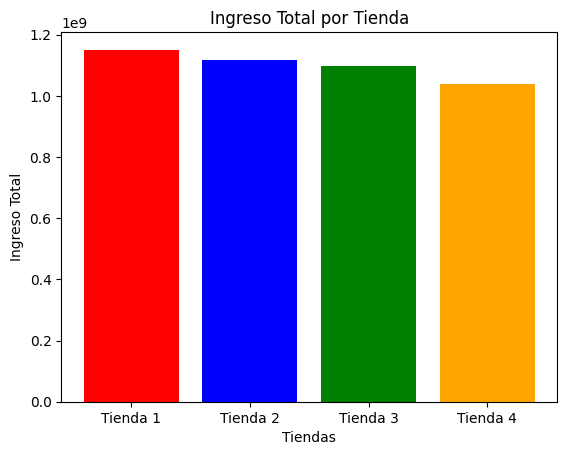

In [ ]:
import matplotlib.pyplot as plt
colores = ['red', 'blue', 'green', 'orange']
plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], [sum(tienda['Precio']), sum(tienda2['Precio']), sum(tienda3['Precio']), sum(tienda4['Precio'])], color=colores)
plt.xlabel('Tiendas')
plt.ylabel('Ingreso Total')
plt.title('Ingreso Total por Tienda')
plt.show()

# 2. Ventas por categoría

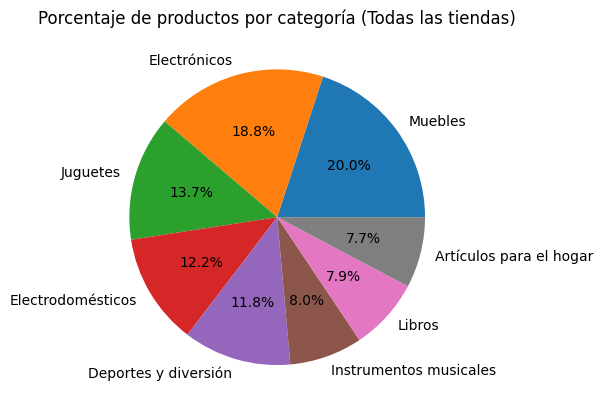

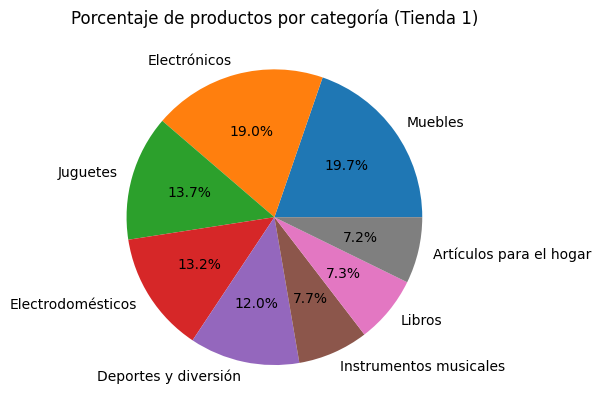

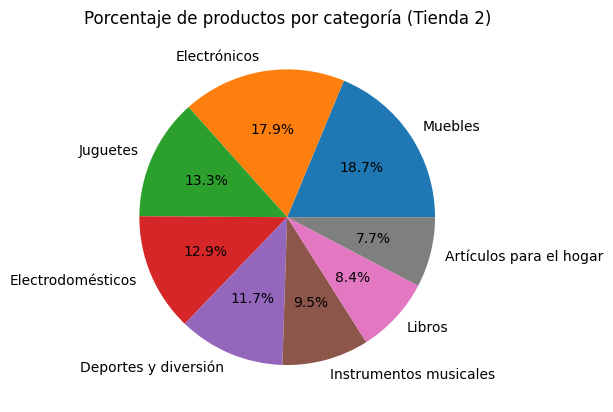

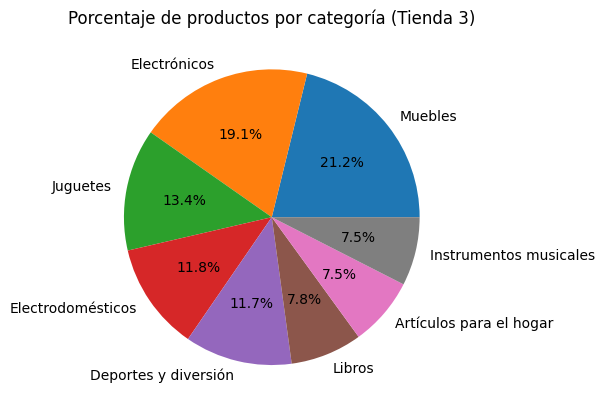

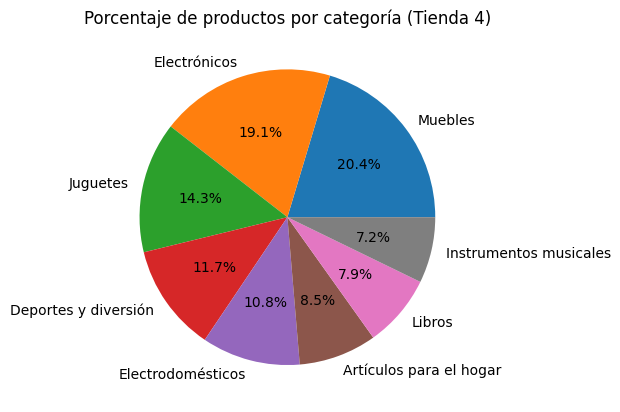

In [ ]:
todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Cantidad de productos por categoría en todas las tiendas
cantidad_productos_por_categoria_todas = todas_las_tiendas.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
plt.pie(cantidad_productos_por_categoria_todas, labels=cantidad_productos_por_categoria_todas.index, autopct='%1.1f%%')
plt.title('Porcentaje de productos por categoría (Todas las tiendas)')
plt.show()

for i, tienda_df in enumerate([tienda, tienda2, tienda3, tienda4]):
    nombre_tienda = f"Tienda {i + 1}"
    cantidad_productos_por_categoria = tienda_df.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)

    plt.pie(cantidad_productos_por_categoria, labels=cantidad_productos_por_categoria.index, autopct='%1.1f%%')
    plt.title(f'Porcentaje de productos por categoría ({nombre_tienda})')
    plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
promedio_calificaciones_tiendas = []
for i, tienda_df in enumerate([tienda, tienda2, tienda3, tienda4]):
    nombre_tienda = f"Tienda {i + 1}"
    promedio_calificacion = round(tienda_df['Calificación'].mean(), 2)
    promedio_calificaciones_tiendas.append(promedio_calificacion)
    print(f"La calificación promedio de la {nombre_tienda} es: {promedio_calificacion}/5")

La calificación promedio de la Tienda 1 es: 3.98/5
La calificación promedio de la Tienda 2 es: 4.04/5
La calificación promedio de la Tienda 3 es: 4.05/5
La calificación promedio de la Tienda 4 es: 4.0/5


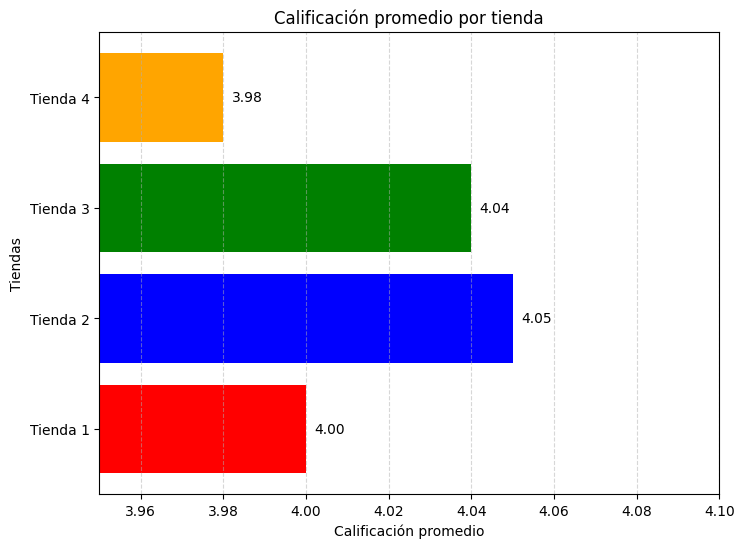

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], promedio_calificaciones_tiendas, color=['red', 'blue', 'green', 'orange'])
plt.xlabel('Calificación promedio')
plt.ylabel('Tiendas')
plt.title('Calificación promedio por tienda')
plt.xlim(3.95, 4.1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
for i, v in enumerate(promedio_calificaciones_tiendas):
    plt.text(v + 0.002, i, f'{v:.2f}', va='center')
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
for i, tienda_df in enumerate([tienda, tienda2, tienda3, tienda4]):
    nombre_tienda = f"Tienda {i + 1}"
    conteo_productos = tienda_df['Producto'].value_counts()
    if not conteo_productos.empty:
        max_ventas = conteo_productos.max()
        min_ventas = conteo_productos.min()
        productos_mas_vendidos = conteo_productos[conteo_productos == max_ventas].index.tolist()
        productos_menos_vendidos = conteo_productos[conteo_productos == min_ventas].index.tolist()
        print(f"En {nombre_tienda}:")
        print(f"🟢 Producto(s) más vendido(s) ({max_ventas} ventas): {', '.join(productos_mas_vendidos)}")
        print(f"🔴 Producto(s) menos vendido(s) ({min_ventas} ventas): {', '.join(productos_menos_vendidos)}")
    else:
        print(f"{nombre_tienda} no tiene productos registrados.")
    print()

En Tienda 1:
🟢 Producto(s) más vendido(s) (60 ventas): Microondas, TV LED UHD 4K, Armario
🔴 Producto(s) menos vendido(s) (33 ventas): Auriculares con micrófono, Celular ABXY

En Tienda 2:
🟢 Producto(s) más vendido(s) (65 ventas): Iniciando en programación
🔴 Producto(s) menos vendido(s) (32 ventas): Juego de mesa

En Tienda 3:
🟢 Producto(s) más vendido(s) (57 ventas): Kit de bancas
🔴 Producto(s) menos vendido(s) (35 ventas): Bloques de construcción

En Tienda 4:
🟢 Producto(s) más vendido(s) (62 ventas): Cama box
🔴 Producto(s) menos vendido(s) (33 ventas): Guitarra eléctrica



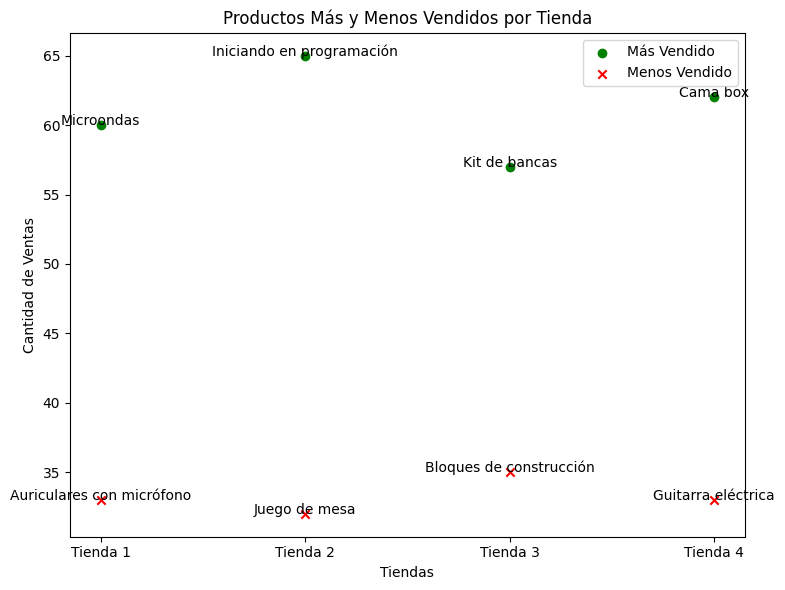

In [ ]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
productos_max = []
ventas_max = []
productos_min = []
ventas_min = []

for i, tienda_df in enumerate([tienda, tienda2, tienda3, tienda4]):
    conteo_productos = tienda_df['Producto'].value_counts()
    if not conteo_productos.empty:
        max_ventas = conteo_productos.max()
        min_ventas = conteo_productos.min()
        productos_mas_vendidos = conteo_productos[conteo_productos == max_ventas].index.tolist()
        productos_menos_vendidos = conteo_productos[conteo_productos == min_ventas].index.tolist()
        productos_max.append(productos_mas_vendidos[0])
        productos_min.append(productos_menos_vendidos[0])
        ventas_max.append(max_ventas)
        ventas_min.append(min_ventas)


fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(tiendas, ventas_max, color='g', label='Más Vendido', marker='o')
ax.scatter(tiendas, ventas_min, color='r', label='Menos Vendido', marker='x')

for i in range(len(tiendas)):
    ax.text(tiendas[i], ventas_max[i], f'{productos_max[i]}', ha='center', fontsize=10, color='black')
    ax.text(tiendas[i], ventas_min[i], f'{productos_min[i]}', ha='center', fontsize=10, color='black')

ax.set_title("Productos Más y Menos Vendidos por Tienda")
ax.set_xlabel("Tiendas")
ax.set_ylabel("Cantidad de Ventas")
ax.legend()
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
envios_promedio = []
for i, tienda_df in enumerate([tienda, tienda2, tienda3, tienda4]):
    nombre_tienda = f"Tienda {i + 1}"
    envios_por_tienda = round(tienda_df['Costo de envío'].mean(), 2)
    envios_promedio.append(envios_por_tienda)
    print(f"El envío promedio de la {nombre_tienda} es: ${envios_por_tienda}")

El envío promedio de la Tienda 1 es: $26018.61
El envío promedio de la Tienda 2 es: $25216.24
El envío promedio de la Tienda 3 es: $24805.68
El envío promedio de la Tienda 4 es: $23459.46


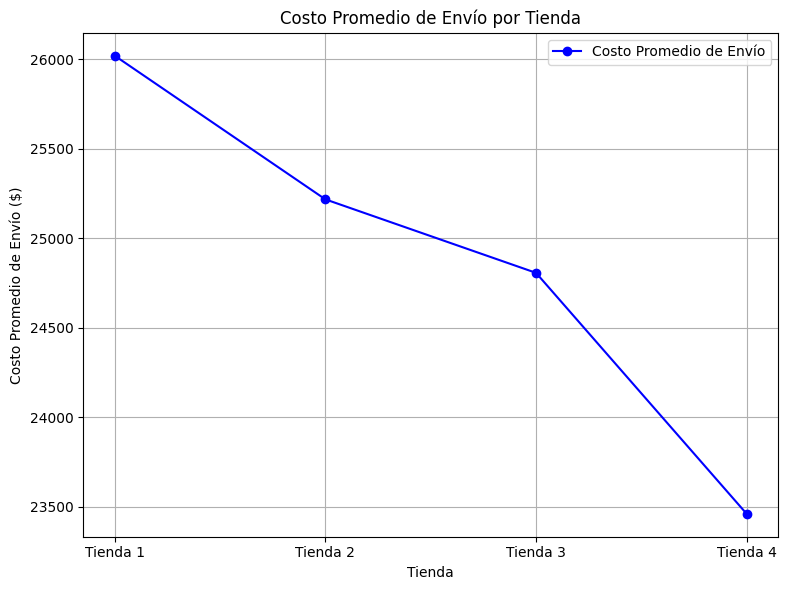

In [ ]:
tiendas = [f"Tienda {i + 1}" for i in range(4)]
plt.figure(figsize=(8, 6))
plt.plot(tiendas, envios_promedio, marker='o', linestyle='-', color='b', label='Costo Promedio de Envío')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio de Envío ($)')
plt.title('Costo Promedio de Envío por Tienda')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Resolución

El propósito de este análisis es determinar cuál de las cuatro tiendas disponibles representa la mejor opción para que el Sr. Juan venda sus productos. Para tomar esta decisión, se consideraron múltiples factores: los ingresos totales generados, la distribución de categorías de productos, la calificación promedio de los clientes, los productos más y menos vendidos y el costo promedio de envío. Esta evaluación integral permitirá identificar la tienda que presenta mejores condiciones comerciales, logísticas y de satisfacción del cliente.

1. Ingresos Totales
*   Tienda 1: $1,150,880,400.0

*   Tienda 2: $1,116,034,500.0

*   Tienda 3: $1,098,019,600.0

*   Tienda 4: $1,038,375,700.0

   Conclusión: La Tienda 1 lidera en ingresos totales, lo que refleja un alto volumen de ventas.


2. Categorías de Productos
Las categorías más fuertes en todas las tiendas fueron Muebles y Electrónicos, superando el 19% del portafolio. Sin embargo:

*   Tienda 1: Muebles (19.7%), Electrónicos (19.0%)

*   Tienda 4: Muebles (20.4%), Electrónicos (19.1%) — mayor enfoque en estas categorías clave

*   Tienda 3 también tiene un portafolio balanceado, con énfasis en Muebles (21.2%).

  Conclusión: Las Tiendas 3 y 4 tienen el portafolio más enfocado en las categorías de alto valor.

3. Calificación Promedio de Clientes
*   Tienda 1: 4.00

*   Tienda 2: 4.05

*   Tienda 3: 4.04

*   Tienda 4: 3.98

 Conclusión: La Tienda 2 tiene la mejor percepción por parte de los clientes.

4. Productos Más y Menos Vendidos
*   Tienda 1 vendió muy bien productos como microondas y TV UHD, pero también tuvo productos con muy bajas ventas.

*   Tienda 2 destacó con “Iniciando en programación” como producto top, lo que sugiere interés en tecnología educativa.

*   Tienda 3 tuvo buena venta de mobiliario (Kit de bancas), sin productos con desempeño muy bajo.

*   Tienda 4 destacó por la “Cama box”, pero tuvo un bajo desempeño en guitarras eléctricas.

Conclusión: Tienda 3 presenta menos productos con bajo rendimiento, lo que indica un portafolio mejor optimizado.

5. Costo Promedio de Envío
*  Tienda 4: $23,450 (más bajo)

*  Tienda 1: $26,050 (más alto)

 Costos decrecen progresivamente de Tienda 1 a Tienda 4.

 Conclusión: La Tienda 4 tiene una clara ventaja logística.

🚫 Tienda que se debería eliminar: Tienda 4
Es la tienda que menos ingresos genera en total, con $1,038,375,700, significativamente por debajo de las demás.

Tiene la peor calificación promedio de los clientes, con un 3.98, lo que refleja una menor satisfacción en comparación con las otras tiendas.

Su producto menos vendido es una guitarra eléctrica, lo que sugiere que su audiencia no está bien alineada con ciertos tipos de productos, posiblemente los de alto valor.

Aunque ofrece el costo de envío promedio más bajo, esta ventaja logística no compensa sus debilidades en ingresos, percepción del cliente y desempeño de productos.

Por estas razones, Tienda 4 es la opción menos favorable y debe ser eliminada del portafolio del Sr. Juan.
